In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist

In [ ]:
class DataScaling:
    def simple_features_scaling(self, pData):
        max = np.max(pData)
        
        return pData / max  
    
    def min_max_scaling(self, pData):
        min = np.min(pData)
        max = np.max(pData)

        return (pData - min) / (max - min)
    

class Normalization:
    def standardization(self, pData):
        std = np.std(pData)
        mean = np.mean(pData)

        return (pData - mean) / std
    
    def mean_normal(self, pData):
        mean = np.mean(pData)
        max = np.max(pData)
        min = np.min(pData)

        return (pData - mean) / (max - min)

    def box_cox_normal(self, pData):
        ...


train_x's shape: (60000, 784)
test_x's shape: (10000, 784)
Cost:  0.8272719628202375 Train Accuracy: 11.448333333333334
Cost:  0.24851371884444107 Train Accuracy: 30.178333333333335
Cost:  0.17864428546261868 Train Accuracy: 45.43333333333333
Cost:  0.14556450738788082 Train Accuracy: 54.27833333333333
Cost:  0.12604093592719418 Train Accuracy: 59.80166666666666
Cost:  0.1129640874041583 Train Accuracy: 63.695
Cost:  0.10348210121472629 Train Accuracy: 66.72166666666666
Cost:  0.09622977811530631 Train Accuracy: 69.185
Cost:  0.0904668065072442 Train Accuracy: 71.00999999999999
Cost:  0.08575311571118777 Train Accuracy: 72.61666666666666
Train Accuracy: 73.92
Test Accuracy: 74.4


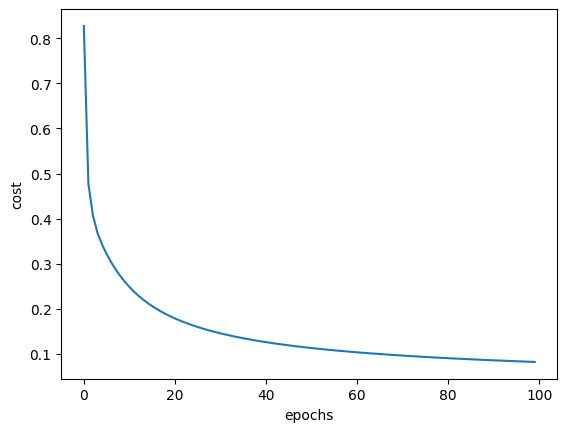

Test case:  [2 2 2 2 7 7 3 7 7 2 2 7 7 7 2 7 7 2 7 2 2 7 2 2 2 2 7 2 7 2 2 2 2 2 3 2 7
 7 2 3 2 7 2 2 2 2 2 3 2 2]


In [18]:
class Neural_Network:
    def __init__(self, pLayers_size):
        # Init size of all layers in neural network
        self.layers_size = pLayers_size
        # Store all parameters such as weights and biases
        self.parameters = {}
        # Store cost for each loop
        self.costs = []
        # Save total of set in dataset
        self.n = 0
        # Save length of total layer
        self.L = len(pLayers_size)

    def initialize_parameters(self):
        # Update length of layers
        # self.L = len(self.layers_size)

        for l in range(1, self.L + 1):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l-1])
            self.parameters["b" + str(l)] = np.random.randn(self.layers_size[l], 1)

    def sigmoid(self, pZ):
        return 1 / (1 + np.exp(-pZ))
    
    def sigmoid_derivative(self, pZ):
        s = self.sigmoid(pZ)

        return s*(1-s)
    
    def softmax(self, pZ):
        sm = np.exp(pZ + np.max(pZ))
        return sm / np.sum(sm, axis=0, keepdims=True)
    
    def forward(self, pX):
        store = {}

        A = pX.T
      
        for l in range(self.L - 1):
            Z = np.dot(self.parameters["W" + str(l + 1)], A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)

            store["Z" + str(l + 1)] = Z
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
        
        Z = np.dot(self.parameters["W" + str(self.L)], A) + self.parameters["b" + str(self.L)]
        A = self.softmax(Z)

        store["Z" + str(self.L)] = Z
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]

        return A, store
    
    def backpropagation(self, pX, py, A, store):
        # Store all derivative of parameters in one variable
        derivatives = {}

        # Save A0 in neural network as X input matrix
        store["A0"] = pX.T

        # This computation for the final layer in backpropagation
        dZ = A - py.T
        dW = np.dot(dZ, store["A" + str(self.L - 1)].T) * 1.0 / self.n
        db = np.mean(dZ, axis=1, keepdims=True)
        dAPrev = np.dot(store["W" + str(self.L)].T, dZ)

        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db

        for l in range(self.L - 1, 0 ,-1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = np.dot(dZ, store["A" + str(l - 1)].T) * 1.0 / self.n
            db = np.mean(dZ, axis=1, keepdims=True)

            if l > 1:
                dAPrev = np.dot(store["W" + str(l)].T, dZ)

            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db

        return derivatives

    def fit(self, pX, py, learning_rate=0.01, n_iterations=1000):
        # Random numbers
        np.random.seed(1)
        # Init the length of dataset
        self.n = pX.shape[0]
        self.layers_size.insert(0, pX.shape[1])
        
        # Init parameters for training
        self.initialize_parameters()

        for loop in range(n_iterations):
            # Feed forward processing
            A, store = self.forward(pX)
            # Compute cost for each predict output
            cost = -np.mean(py * np.log(A.T + 1e-8))
            # Backpropagation
            derivatives = self.backpropagation(pX, py, A, store)

            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives["dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives["db" + str(l)]

            if loop % 100 == 0:
                    print("Cost: ", cost, "Train Accuracy:", self.evaluate(pX, py))

            if loop % 10 == 0:
                self.costs.append(cost)
    
    def evaluate(self, pX, py):
        # A, cache = self.forward(pX)
        # y_hat = np.argmax(A, axis=0)
        y_hat = self.predict(pX)
        py = np.argmax(py, axis=1)
        accuracy = (y_hat == py).mean()
        return accuracy * 100

    def predict(self, pX):
        A, cache = self.forward(pX)
        y_hat = np.argmax(A, axis=0)
        
        return y_hat

    def plot_costs(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

def pre_process_data(train_x, train_y, test_x, test_y):
    # Normalize
    train_x = train_x / 255.
    test_x = test_x / 255.

    enc = OneHotEncoder(sparse_output=False, categories='auto')
    
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
    
    return train_x, train_y, test_x, test_y

if __name__ == '__main__':
    (train_x, train_y), (test_x, test_y) = mnist.load_data()

    train_x = train_x.reshape(-1, 784)
    test_x = test_x.reshape(-1, 784)
    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')

    train_x, train_y, test_x, test_y = pre_process_data(train_x, train_y, test_x, test_y)
    
    print("train_x's shape: " + str(train_x.shape))
    print("test_x's shape: " + str(test_x.shape))
    
    layers_dims = [50, 10]
    
    ann = Neural_Network(layers_dims)
    ann.fit(train_x, train_y, learning_rate=0.1, n_iterations=1000)
    print("Train Accuracy:", ann.evaluate(train_x, train_y))
    print("Test Accuracy:", ann.evaluate(test_x, test_y))
    ann.plot_costs()

    print("Test case: ", ann.predict(test_x[0]))
    


In [ ]:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}


def simplest(d):
    for _ in d:
        print(_)
        
    
def extract(d):
    for _ in [*d]:
        print(_)
        
    
def keys(d):
    for _ in d.keys():
        print(_)
    
def items(d):
    for _ in d.items():
        print(_)

simplest(thisdict)
ann.plot_costs()
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print(train_y[1])
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
